<a href="https://colab.research.google.com/github/snjauregui/notebooks/blob/main/TP1_Properati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Library Imports

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import re
print("Setup Complete")


Setup Complete


Load data

In [48]:
properatti_data_filepath = '/content/drive/MyDrive/Colab Notebooks/Data Science - Digital House/properatti.csv'
properatti_data = pd.read_csv(properatti_data_filepath)

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 75


properatti_data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inm...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_l...,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/198x0...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavader...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-p...,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f5l8TrxdY-0kvs=/trim/198x0...


In [49]:
properatti_data = properatti_data[['operation',
 'property_type',
 'place_name',
 'country_name',
 'state_name',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'description',
 'title',]]

properatti_data.head()

,operation,property_type,place_name,country_name,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,sell,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,Argentina,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37
2,sell,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,72000.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,sell,PH,Liniers,Argentina,Capital Federal,-34.647797,-58.516424,95000.0,USD,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado
4,sell,apartment,Centro,Argentina,Buenos Aires Costa Atlántica,-38.002626,-57.549447,64000.0,USD,64000.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE


In [50]:
properatti_data.count()

operation              121220
property_type          121220
place_name             121197
country_name           121220
state_name             121220
lat                     69670
lon                     69670
price                  100810
currency               100809
price_aprox_usd        100810
surface_total_in_m2     81892
price_usd_per_m2        68617
price_per_m2            87658
floor                    7899
rooms                   47390
expenses                14262
description            121218
title                  121220
dtype: int64

# Checks

##  Column values

In [51]:
operation = properatti_data['operation'].unique()
print(operation)

['sell']


In [52]:
property_type = properatti_data['property_type'].unique()
print(property_type)

['PH' 'apartment' 'house' 'store']


In [53]:
country_name = properatti_data['country_name'].unique()
print(country_name)

['Argentina']


In [54]:
state_name = properatti_data['state_name'].unique()
print(state_name)

['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Entre Ríos' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Córdoba'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Buenos Aires Interior' 'Salta'
 'Neuquén' 'Río Negro' 'San Luis' 'Mendoza' 'Corrientes' 'Chubut'
 'Tucumán' 'La Pampa' 'Chaco' 'San Juan' 'Santa Cruz' 'Tierra Del Fuego'
 'Catamarca' 'Santiago Del Estero' 'Jujuy' 'La Rioja' 'Formosa']


In [55]:
currency = properatti_data['currency'].unique()
print(currency)

['USD' nan 'ARS' 'PEN' 'UYU']


## null Check

In [56]:
percent_missing = properatti_data.isnull().sum() * 100 / len(properatti_data)
missing_value_df = pd.DataFrame({'column_name': properatti_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df


,column_name,percent_missing
operation,operation,0.000000
property_type,property_type,0.000000
place_name,place_name,0.018974
country_name,country_name,0.000000
state_name,state_name,0.000000
lat,lat,42.525986
lon,lon,42.525986
price,price,16.837156
currency,currency,16.837981
price_aprox_usd,price_aprox_usd,16.837156


## Cantidad de ambientes

In [57]:
properatti_data_amb = properatti_data[properatti_data.title.str.contains("amb", case=False)]
properatti_data_amb.head()


,operation,property_type,place_name,country_name,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,sell,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB
2,sell,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,72000.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,sell,PH,Liniers,Argentina,Capital Federal,-34.647797,-58.516424,95000.0,USD,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado
4,sell,apartment,Centro,Argentina,Buenos Aires Costa Atlántica,-38.002626,-57.549447,64000.0,USD,64000.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE
7,sell,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,138000.0,45.0,3066.666667,3450.000000,NaN,NaN,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO CO...,"JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CATEGORIA , VENTA"


In [58]:
properatti_data_regex = properatti_data
properatti_data_regex['ambientes'] = properatti_data.description.str.extract('([0-9]*) amb')

In [59]:
properatti_data_regex[properatti_data_regex['ambientes'].notnull()]

,operation,property_type,place_name,country_name,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,ambientes
3,sell,PH,Liniers,Argentina,Capital Federal,-34.647797,-58.516424,95000.0,USD,95000.00,NaN,NaN,NaN,NaN,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado,3
11,sell,house,San Miguel,Argentina,Bs.As. G.B.A. Zona Norte,-34.539057,-58.719609,150000.0,USD,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,"Entrada de Coche, Jardin, Living en desnivel, Comedor, Cocina, Toillete...",CHALET,1
13,sell,apartment,Palermo Soho,Argentina,Capital Federal,NaN,NaN,111700.0,USD,111700.00,50.0,2234.000000,3723.333333,NaN,1.0,NaN,Torre I Mondrian. 3 ambientes con terraza y dos baños al frente.Vitrau...,Vitraux Palermo,3
16,sell,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,239000.00,140.0,1707.142857,2438.775510,NaN,4.0,NaN,Ventas Mataderos al frente Duplex 4 amb.- Planta Baja: Entrada de auto-...,VENTA-MATADEROS-DUPLEX 4 AMB.,4
17,sell,apartment,Barrio El Golf,Argentina,Bs.As. G.B.A. Zona Norte,-34.408717,-58.634389,315000.0,USD,315000.00,176.0,1789.772727,4038.461538,NaN,3.0,NaN,Excelente 3 ambientes en un 6 piso y con terraza propia en el 7 pisoEn ...,3 ambientes en venta en Acqua Golf 1 en Nordelta con espectacular vista...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121204,sell,apartment,Córdoba,Argentina,Córdoba,NaN,NaN,1502000.0,ARS,84237.68,50.0,1684.753600,NaN,NaN,NaN,NaN,"UBICACIÓNEstratégicamente ubicado en calle Obispo Trejo 825, estos depa...",Departamento - Nueva Cordoba,
121205,sell,apartment,Córdoba,Argentina,Córdoba,NaN,NaN,1507000.0,ARS,84518.10,50.0,1690.362000,NaN,NaN,NaN,NaN,"UBICACIÓNEstratégicamente ubicado en calle Obispo Trejo 825, estos depa...",Departamento - Nueva Cordoba,
121206,sell,apartment,Córdoba,Argentina,Córdoba,NaN,NaN,1507000.0,ARS,84518.10,50.0,1690.362000,NaN,NaN,NaN,NaN,"UBICACIÓNEstratégicamente ubicado en calle Obispo Trejo 825, estos depa...",Departamento - Nueva Cordoba,
121209,sell,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,410000.00,157.0,2611.464968,NaN,NaN,NaN,6300.0,Edificio en esquina de muy buena categoría de unos 45 años de antigüeda...,Av .Luis Maria Campos 1400- Belgrano-Capital Federal,


## Duplicados

In [60]:
list(properatti_data.columns)

['operation',
 'property_type',
 'place_name',
 'country_name',
 'state_name',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'description',
 'title',
 'ambientes']

In [61]:
properatti_data.count()

operation              121220
property_type          121220
place_name             121197
country_name           121220
state_name             121220
lat                     69670
lon                     69670
price                  100810
currency               100809
price_aprox_usd        100810
surface_total_in_m2     81892
price_usd_per_m2        68617
price_per_m2            87658
floor                    7899
rooms                   47390
expenses                14262
description            121218
title                  121220
ambientes               38543
dtype: int64

In [62]:
properatti_data_wo_duplicates = properatti_data.drop_duplicates(subset=['description'], keep="first")

In [63]:
properatti_data_wo_duplicates.count()

operation              104056
property_type          104056
place_name             104033
country_name           104056
state_name             104056
lat                     61890
lon                     61890
price                   88154
currency                88154
price_aprox_usd         88154
surface_total_in_m2     68544
price_usd_per_m2        58924
price_per_m2            76260
floor                    6054
rooms                   41619
expenses                13193
description            104055
title                  104056
ambientes               32591
dtype: int64

Revisar si hay filas duplicadas

Ver de sumar algo geo 

Ver si podemos aprovechar algo de la descripción

hay 20k propiedades sin precio en dolares, pero esas tampoco tienen precio en ARS. Si filtramos a todas las propiedades sin precio podemos usar la columna que viene del dataset

Los nulos en el campo de currency son en los registros que no tienen precio.
¿Tiene sentido que nos quedemos con estos registros si vamos a usar el dataset para predecir precios de nuevas publicaciones?

nulls Check


Geo? 

Consideramos lat y lon, place_name, o ambos?

¿Normalizamos las monedas a una sola? Habría que flagear esos registros


# Limpieza

In [64]:
properatti_data = properatti_data[properatti_data['currency'].notnull()]
properatti_data.head(5)

,operation,property_type,place_name,country_name,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,ambientes
0,sell,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB,NaN
1,sell,apartment,La Plata,Argentina,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,NaN
2,sell,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,72000.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,NaN
3,sell,PH,Liniers,Argentina,Capital Federal,-34.647797,-58.516424,95000.0,USD,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado,3
4,sell,apartment,Centro,Argentina,Buenos Aires Costa Atlántica,-38.002626,-57.549447,64000.0,USD,64000.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,NaN


In [65]:
properatti_data.price_aprox_usd.count()

100809

In [66]:
properatti_data = properatti_data.drop_duplicates(subset=['description'], keep="first")

In [67]:
properatti_data.count()

operation              88392
property_type          88392
place_name             88369
country_name           88392
state_name             88392
lat                    52482
lon                    52482
price                  88392
currency               88392
price_aprox_usd        88392
surface_total_in_m2    59351
price_usd_per_m2       59102
price_per_m2           76467
floor                   5450
rooms                  34977
expenses               12317
description            88391
title                  88392
ambientes              29768
dtype: int64

# Columnas nuevas

In [72]:
#No Ameties:
#Escalera
#Baulera


###Ameties a considerar:
#Ascensor
#Pileta
#Iluminacion
#Cochera+garage+estacionamiento + guarda coche + guardacoche
#Parrilla 
#Laundry
#SUM
#Jardin
#Balcon


In [73]:
#Escalera
df_data_ameties= properatti_data
esc = df_data_ameties.description.str.contains("escalera", case=False)
df_data_ameties["Escalera"] = esc
df_data_ameties.value_counts('Escalera')


#Validacion
Con_Escalera = df_data_ameties['Escalera'] == True
df_data_ameties.value_counts(Con_Escalera)
pd.options.display.max_colwidth = 250
df_data_ameties.description[Con_Escalera]



35        Hermoso departamento de cuatro ambientes, refaccionado totalmente a nuevo tanto en los ambientes como en las instalaciones de gas, agua y electricidad. Segundo piso por escalera. Madera de primera calidad en todos los ambientes, el living está co...
46        Excelente Duplex, en Condominio con Seguridad.PB:Living -comedor,cocina integrados, toillete,dormitorio.Patio con Parrilla.PA: Dos dormitorios amplios con placard,Baño ( con toallero con radiador)y hall de distribucion.Pisos de Porcelanato, En lo...
58        Magnífica residencia con calidad de construcción superlativa. Se trata de un chalet con frente de ladrillo a la vista y techo pizarra. Desarrollado sobre un lote de 1300m2, totalmente soleado por su orientación Norte y entorno privado. Salida a d...
71        COMPLEjO DE DTOS. EN PH. DOS DTOS DE 3 AMB. EN PLANTA ALTA POR ESCALERA( UNO A LA CALLE Y EL OTRO AL C/FTE)CON COCHERASAMPLIAS MEDIDAS -A ESTRENAR.COCINA INTEGRADA AL LIVING COMEDOR ( CON SECTOR LAVADERO)BAÑO C

In [74]:
#Baulera
baul = df_data_ameties.description.str.contains(" Baulera", case=False)
df_data_ameties["Baulera"] = baul
df_data_ameties.value_counts('Baulera')


#Validacion
Con_Baulera = df_data_ameties['Baulera'] == True
df_data_ameties.value_counts(Con_Baulera)
df_data_ameties.description[Con_Baulera]


17        Excelente 3 ambientes en un 6 piso y con terraza propia en el 7 pisoEn la planta principal: Dormitorio principal en suite y Living comedor con vista al lago, Cocina integrada y lavadero, segundo baño completo que hace tambien de toilette, y el se...
19        Excelente semipiso al contra frente en Bulnes y Libertador. Espectacular pulmón muy luminoso con árboles. Buen edificio con entrada reciclada hace dos años. Hall de entrada. Living comedor de muy buenas dimensiones con salida al balcón aterrazado...
24        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORIA EN VENTA EN CASTELAR160 MTS2  Cubiertos.  4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO PUBLICADO CORRESPONDE AL VALOR DE CONTADO  para las unidades de primer y seg...
25        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORÍA EN VENTA EN CASTELAR160 MTS2  Cubiertos.  4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO PUBLICADO CORRESPONDE AL VALOR DE CONTAD

In [ ]:
#Ascensor
elev= ['elevador', 'ascensor']
ascensor = df_data_ameties.description.str.contains('|'.join(elev), case=False)
#ascensor.value_counts()
df_data_ameties["Ascensor"] = ascensor
df_data_ameties.value_counts('Ascensor')

#Validacion
Con_ascensor = df_data_ameties['Ascensor'] == True
df_data_ameties.value_counts(Con_ascensor)
pd.options.display.max_colwidth = 400
df_data_ameties.description[Con_ascensor]


In [ ]:
#Iluminacion
ilum= ['iluminacion', 'iluminación']
iluminacion = df_data_ameties.description.str.contains('|'.join(ilum), case=False)
df_data_ameties["Iluminacion"] = iluminacion
df_data_ameties.value_counts('Iluminacion')

#Validacion
Con_Ilum = df_data_ameties['Iluminacion'] == True
df_data_ameties.value_counts(Con_Ilum)
df_data_ameties.description[Con_Ilum]


In [ ]:
#Cochera
coche= ['Cochera', 'garage', 'estacionamiento', 'guarda coche', 'guardacoche']
cochera = df_data_ameties.description.str.contains('|'.join(coche), case=False)
df_data_ameties["Cochera"] = cochera
df_data_ameties.value_counts('Cochera')

#Validacion
Con_cochera = df_data_ameties['Cochera'] == True
df_data_ameties.value_counts(Con_cochera)
df_data_ameties.description[Con_cochera]


In [ ]:
#Parrilla
parri= ['Parrilla']
Parrilla = df_data_ameties.description.str.contains('|'.join(parri), case=False)
df_data_ameties["Parrilla"] = Parrilla
df_data_ameties.value_counts('Parrilla')

#Validacion
Con_Parrilla = df_data_ameties['Parrilla'] == True
df_data_ameties.value_counts(Con_Parrilla)
df_data_ameties.description[Con_Parrilla]


In [ ]:
#Laundry

laun = df_data_ameties.description.str.contains("laundry", case=False)
df_data_ameties["Laundry"] = laun
df_data_ameties.value_counts('Laundry')


#Validacion
Con_Laundry = df_data_ameties['Laundry'] == True
df_data_ameties.value_counts(Con_Laundry)
df_data_ameties.description[Con_Laundry]

In [ ]:
#SUM

sum_ = df_data_ameties.description.str.contains(" sum ", case=False)
df_data_ameties["SUM"] = sum_
df_data_ameties.value_counts('SUM')


#Validacion
Con_SUM = df_data_ameties['SUM'] == True
df_data_ameties.value_counts(Con_SUM)
df_data_ameties.description[Con_SUM]

In [ ]:
#Jardin

jard = df_data_ameties.description.str.contains(" Jardin ", case=False)
df_data_ameties["Jardin"] = jard
df_data_ameties.value_counts('Jardin')


#Validacion
Con_Jardin = df_data_ameties['Jardin'] == True
df_data_ameties.value_counts(Con_Jardin)
df_data_ameties.description[Con_Jardin]

In [ ]:
#Balcon

balc= [' Balcon', ' Balcón']
Balcon = df_data_ameties.description.str.contains('|'.join(balc), case=False)
#pileta.value_counts()
df_data_ameties["Balcon"] = Balcon
df_data_ameties.value_counts('Balcon')

#Validacion
Con_Balcon = df_data_ameties['Balcon'] == True
df_data_ameties.value_counts(Con_Balcon)
df_data_ameties.description[Con_Balcon]

In [ ]:
#Ameties
ametie = ((df_data_ameties['Ascensor'] == True) | (df_data_ameties['Pileta'] == True) | 
(df_data_ameties['Cochera'] == True) | (df_data_ameties['Parrilla'] == True) | 
(df_data_ameties['Laundry'] == True) | (df_data_ameties['SUM'] == True) | (df_data_ameties['Balcon'] == True))

df_data_ameties["Ameties"] = ametie
df_data_ameties.value_counts('Ameties')

#Validacion
Con_Ameties = df_data_ameties['Ameties'] == True
df_data_ameties.value_counts(Con_Ameties)
df_data_ameties.description[Con_Ameties]

In [ ]:
df_data_ameties.columns()

combinacion de precio con superficie
descartar outliers

# Visualización

Text(0, 0.5, 'Count')

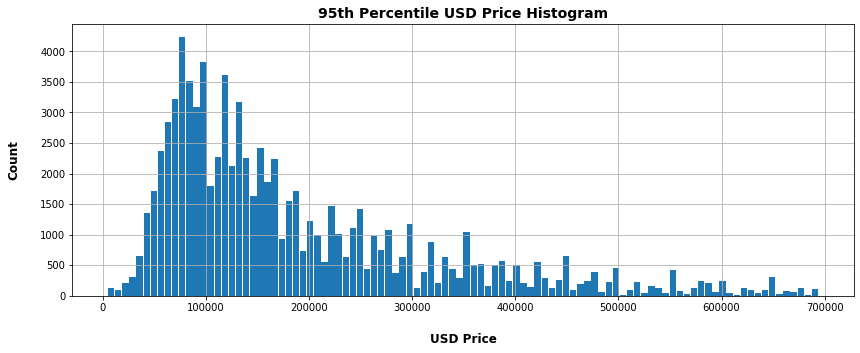

In [ ]:
properatti_data_wo_nan_price_p95_price = properatti_data.loc[properatti_data['price_aprox_usd'] 
                                   < properatti_data.price_aprox_usd.quantile(0.95)]

plt = properatti_data_wo_nan_price_p95_price.price_aprox_usd.plot.hist(grid=True,
                                           bins=100,
                                           rwidth=0.9,
                                           figsize=(14,5))

plt.set_title("95th Percentile USD Price Histogram", weight='bold', size=14)
plt.set_xlabel("USD Price", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Count", labelpad=20, weight='bold', size=12)


Text(0, 0.5, 'Count')

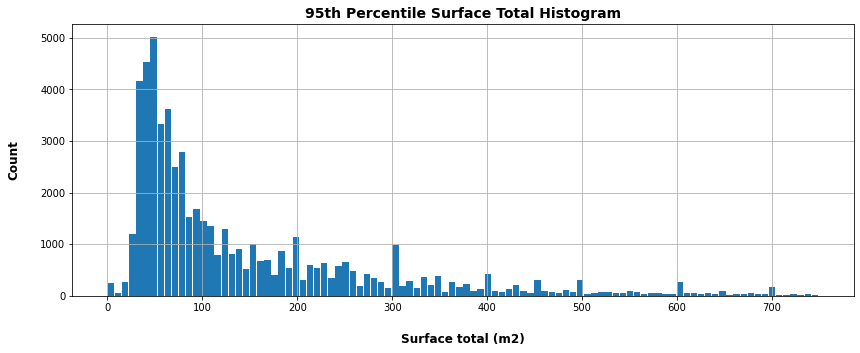

In [ ]:
properatti_data_wo_nan_price_p95_surf = properatti_data.loc[properatti_data['surface_total_in_m2'] 
                                   < properatti_data.surface_total_in_m2.quantile(0.95)]

plt = properatti_data_wo_nan_price_p95_surf.surface_total_in_m2.plot.hist(grid=True,
                                           bins=100,
                                           rwidth=0.9,
                                           figsize=(14,5))

plt.set_title("95th Percentile Surface Total Histogram", weight='bold', size=14)
plt.set_xlabel("Surface total (m2)", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Count", labelpad=20, weight='bold', size=12)
